### Initialize the environment

In [23]:
import theano
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [24]:
src_dir='../src' # source directory
run_dir_prefix='../MDBN_run/OV_Batch_' # directory with the results of previous runs
data_dir='../data' # directory with the data files

In [25]:
import sys
sys.path.insert(0, src_dir)
import MDBN
import main

### Load the experiment results

In [26]:
run=1
date_time='2017-02-20_1509' # specify the date and time of the run in the format YYYY-MM-DD_HHMM
run_dir=run_dir_prefix+date_time
runfile='Exp_%s_run_%s.npz' % (date_time, run) # location of the experiment results
config, dbn_dict = MDBN.load_network(runfile, run_dir)

### Configuration of the experiment

In [27]:
config

{u'dbns': {u'DM': {u'batchSize': 1,
   u'datafile': u'TCGA_Data/3.Methylation_0.5.out',
   u'epochs': [20, 800],
   'inputNodes': 15418,
   u'k': 1,
   u'lambdas': [0.0, 1.0],
   u'layersNodes': [400, 40],
   u'lr': [0.0005, 0.1],
   u'persistent': False},
  u'GE': {u'batchSize': 1,
   u'datafile': u'TCGA_Data/3.GE1_0.5.out',
   u'epochs': [20, 800],
   'inputNodes': 16046,
   u'k': 1,
   u'lambdas': [0.0, 0.01],
   u'layersNodes': [400, 40],
   u'lr': [0.0005, 0.01],
   u'persistent': True},
  u'ME': {u'batchSize': 1,
   u'datafile': u'TCGA_Data/3.miRNA_0.5.out',
   u'epochs': [20],
   'inputNodes': 799,
   u'k': 10,
   u'lambdas': [0.0, 0.1],
   u'layersNodes': [40],
   u'lr': [0.0005],
   u'persistent': True}},
 u'p': 1.0,
 u'pathways': [u'ME', u'GE', u'DM'],
 u'runs': 2,
 u'seed': 1234,
 u'top': {u'batchSize': 1,
  u'epochs': [800, 800],
  'inputNodes': 120,
  u'k': 1,
  u'layersNodes': [24, 3],
  u'lr': [0.005, 0.01],
  u'persistent': True},
 u'uuid': u'9483894719885b2dab1360ede1c

### Load the dataset and visualize the input of the pathways

In [28]:
datafiles = main.prepare_TCGA_datafiles("OV",config,data_dir)

### Look at the joint layer representation

In [29]:
dbn_output_list=[]
for key in config['pathways']:
    dbn_output, _ = dbn_dict[key].MLP_output_from_datafile(datafiles[key], datadir=data_dir)
    dbn_output_list.append(dbn_output)

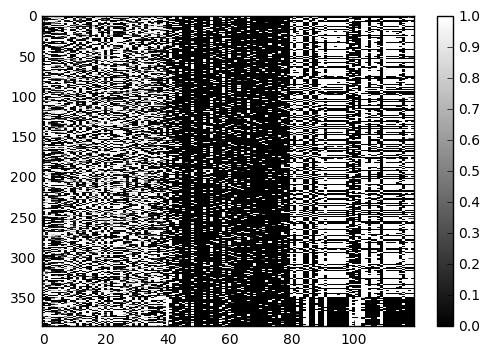

In [30]:
joint_layer = np.concatenate(dbn_output_list,axis=1)
plt.imshow(joint_layer, interpolation='none', cmap='gray')
plt.axis('tight')
plt.colorbar()

In [31]:
joint_layer[1:10,1:10]

array([[  9.90659416e-01,   9.99957860e-01,   9.88582790e-01,
          8.45998764e-01,   9.71462488e-01,   9.87210751e-01,
          1.08056329e-03,   8.13339921e-06,   8.54819518e-05],
       [  4.22845222e-03,   1.49472989e-03,   9.17032242e-01,
          8.92017961e-01,   6.63147748e-01,   9.99997079e-01,
          8.59078392e-03,   9.93743777e-01,   9.99998152e-01],
       [  1.01186177e-02,   6.56236443e-05,   8.64692673e-04,
          2.84083307e-01,   9.77655888e-01,   6.88034401e-04,
          9.99162436e-01,   9.99920487e-01,   9.38410044e-01],
       [  9.99407172e-01,   3.07828248e-01,   1.34250824e-03,
          6.82294648e-03,   5.63112497e-01,   3.71359149e-03,
          9.67664361e-01,   9.99955475e-01,   6.52278483e-01],
       [  3.74257445e-01,   9.61575329e-01,   9.99306381e-01,
          9.97166038e-01,   5.67121565e-01,   9.99877512e-01,
          7.75472075e-02,   7.53343403e-02,   9.99974906e-01],
       [  9.96010303e-01,   9.99880016e-01,   9.97447789e-01,
   

### Check the weights distributions

([array([  0.00000000e+00,   7.00000000e+00,   1.51000000e+02,
           1.81700000e+03,   5.85800000e+03,   6.08100000e+03,
           1.93900000e+03,   1.88000000e+02,   5.00000000e+00,
           0.00000000e+00]),
  array([  0.00000000e+00,   2.00000000e+00,   1.42000000e+02,
           1.79200000e+03,   6.01300000e+03,   5.94500000e+03,
           1.96200000e+03,   1.85000000e+02,   5.00000000e+00,
           0.00000000e+00]),
  array([  0.00000000e+00,   4.00000000e+00,   1.54000000e+02,
           1.66000000e+03,   5.79200000e+03,   6.32400000e+03,
           1.97700000e+03,   1.32000000e+02,   3.00000000e+00,
           0.00000000e+00]),
  array([  1.00000000e+00,   1.60000000e+01,   2.71000000e+02,
           2.09600000e+03,   5.76900000e+03,   5.62200000e+03,
           2.00200000e+03,   2.58000000e+02,   1.10000000e+01,
           0.00000000e+00]),
  array([  0.00000000e+00,   1.30000000e+01,   2.92000000e+02,
           2.09100000e+03,   5.58100000e+03,   5.50300000e+03,
  

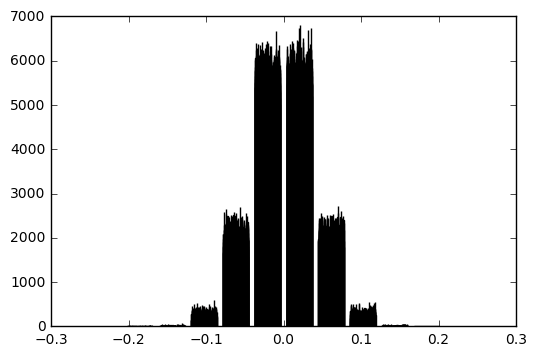

In [32]:
plt.hist(dbn_dict['GE'].rbm_layers[0].W.get_value())

### Check final results

([<matplotlib.axis.XTick at 0x13d696e50>,
 <a list of 3 Text xticklabel objects>)

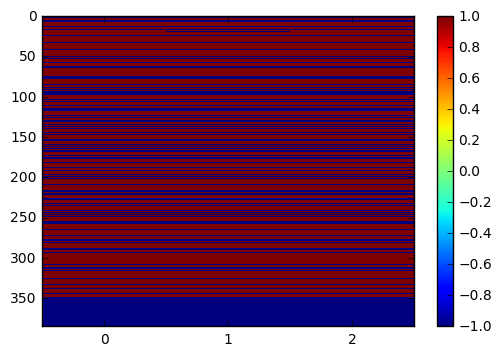

In [33]:
top_output = dbn_dict['top'].get_output(theano.shared(joint_layer,borrow=True))
plt.imshow((top_output>0.8)*np.ones_like(top_output)-(top_output<0.2)*np.ones_like(top_output),interpolation='none',extent=[0,3,385,0])
plt.colorbar()
plt.axis('tight')
plt.xticks(np.arange(0.5,3.5,1),('0','1','2'))

([<matplotlib.axis.XTick at 0x143380c50>,
 <a list of 3 Text xticklabel objects>)

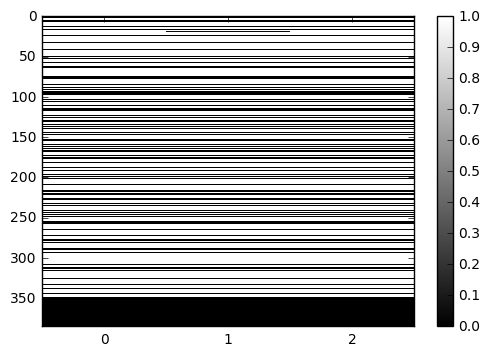

In [45]:
plt.imshow(top_output, interpolation='none',extent=[0,3,385,0],cmap='gray')
plt.axis('tight')
plt.colorbar()
plt.xticks(np.arange(0.5,3.5,1),('0','1','2'))

([array([ 146.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,  239.]),
  array([ 147.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,  238.]),
  array([ 146.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,  239.])],
 array([  6.45413792e-11,   1.00000000e-01,   2.00000000e-01,
          3.00000000e-01,   4.00000000e-01,   5.00000000e-01,
          6.00000000e-01,   7.00000000e-01,   8.00000000e-01,
          9.00000000e-01,   1.00000000e+00]),
 <a list of 3 Lists of Patches objects>)

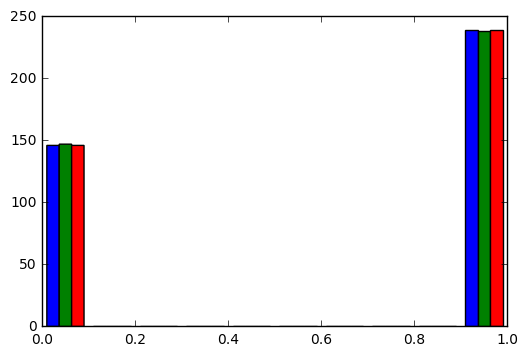

In [35]:
plt.hist(top_output)

In [36]:
code = (top_output[:,0:3] > 0.5) * np.ones_like(top_output[:,0:3])

In [37]:
from utils import find_unique_classes
U = find_unique_classes(code)
cl = U[0]

(array([ 146.,    1.,  238.]),
 array([-0.5,  0.5,  1.5,  2.5]),
 <a list of 3 Patch objects>)

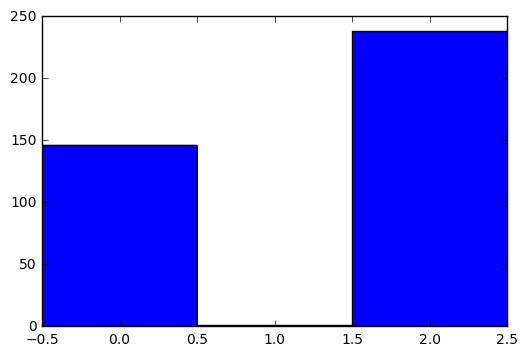

In [38]:
max_cl = np.max(cl)
plt.hist(cl,bins=np.arange(-0.5,max_cl + 1.5,1))

Check Survival curves for the different classes
===============================================

In [39]:
import csv
id=[]
with open('../data/'+datafiles['ME']) as f:
    my_csv = csv.reader(f,delimiter='\t')
    id = my_csv.next()

In [40]:
stat={}
with open('../data/TCGA_Data/data_bcr_clinical_data_patient.csv') as f:
    reader = csv.reader(f, delimiter='\t')
    for row in reader:
        patient_id=row[1]
        stat[patient_id]=(row[15],row[16],row[17])

In [41]:
import re
time_list = []
event_list = []
group_list = []
print('The following case IDs were  not found in clinical data')
for index, key in enumerate(id[1:]):
    m = re.match('TCGA-\w+-\d+', key)
    patient_id = m.group(0)
    if patient_id in stat:
        patient_stat = stat[patient_id]
        add_group = True
        try:
            time_list.append(float(patient_stat[2]))
            event_list.append(1)
        except ValueError:
            try:
                time_list.append(float(patient_stat[1]))
                event_list.append(0)
            except ValueError:
                print('No data for %s' % patient_id)
                add_group = False
        if add_group:
            group_list.append(cl[index])
    else:
        print(patient_id)

The following case IDs were  not found in clinical data
TCGA-24-0981
No data for TCGA-04-1519
No data for TCGA-04-1360
TCGA-01-0639
TCGA-01-0642
No data for TCGA-04-1357
TCGA-01-0628
TCGA-04-1331
TCGA-01-0636
TCGA-01-0633
TCGA-01-0637
TCGA-01-0631
TCGA-01-0630


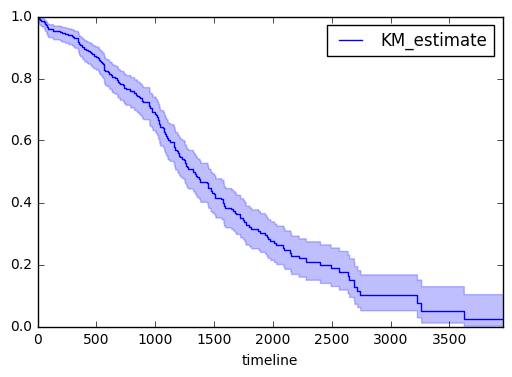

In [42]:
from lifelines import KaplanMeierFitter
kmf = KaplanMeierFitter()
kmf.fit(time_list,event_observed=event_list)
kmf.plot()

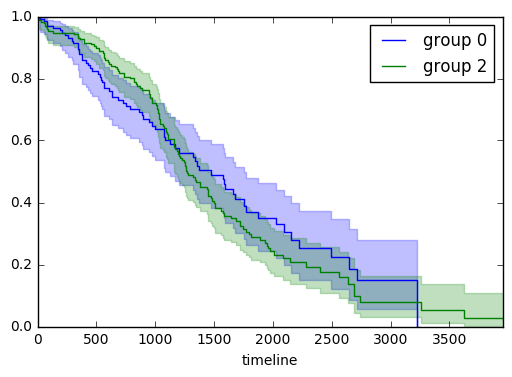

In [44]:
T=np.array(time_list)
E=np.array(event_list)
ix = (np.array(group_list) == 0)
kmf.fit(T[ix], E[ix], label='group 0')
ax=kmf.plot()
for i in range(2,3):
    ix=(np.array(group_list)==i)
    kmf.fit(T[ix], E[ix], label='group %d' % i)
    kmf.plot(ax=ax)